<a href="https://en.wikipedia.org/wiki/Machine_learning">Machine learning</a> means figuring out computer algorithms that do not need explicit instructions to solve a problem. For problems that we have seen till now, we have provided explicit commands to the computer. An example problem where that may not be the case is recognizing a hand-written number. 

The key difference between machine learning (sometimes also called computational statistics) and regular statistics is that machine learning rests on the philosophy of prediction. In other words, the idea of machine learning is to be able to come up with an algorithm for finding patterns in data that works well on *unseen* data.

There are two possibly different goals in analysis

One is to be able to infer underlying patterns in the data and the nature of those patterns. This is what we have seen till now. t-test, ANOVA, GLM etc are all modeling data as resulting from linear combinations of some variables

Such a linear model tells us what factors likely underlie the observations we made. e.g. is spiking related to speed of the animal, stress level or cue presentation?

A different goal could be to use the data primarily to predict new data. In this case, the more important aspect is predictive accuracy

For example, suppose you are a financial analyst that has to predict stock prices of a company. It does not matter how you come up with a prediction as long as the predictions are accurate. So you can devise extremely complex models which are difficult, if not impossible to interpret but have high predictive power

Another example is if you are a doctor and you are using blood level markers and neuroimaging data to diagnose neurological disorders. It does not matter how you do the prediction as long as you can do a good job at it.

In both of these cases, the main (only) thing that matters is how you can predict the future, or *unseen* data. You can use all available resources and past data to come up with fancy models. But these models are useless if they don't predict new data, even if they provide compelling fits to the past data

This provides an important concept related to the previous lecture on GLMs. I said that you can use the Akaike Information Criterion to select an appropriate model. In fact, an even better solution to that problem is to figure out which model best predicts new data

Thus, even for relatively simple linear models of the kind that we saw, we can use the philoshophy of prediction to choose the appropriate model of the data

In practice, if you do not have new data, one approach is to use a fraction of the already collected data to train your model and then test the accuracy of the model in the remaining held out data. This is called cross validation

Thus to sum up, machine learning is primarily focused on prediction, whereas the classical statistical methods we covered until now are focused on inference

Let us go back to our simple description of data as the sum of a model and some error

Y = f(X) + error

where f is some generic function

The problem we have as data analysts is to estimate f so as to find the underlying pattern. Until now, we have generally stuck to linear models. Real data are rarely linear.

The difficulty, however, is that we might never be able to find the true f among the infinite possibilities. 

So one possibility to solve this is to use fairly complex models for f so that we can get good predictive power. The other approach is to use simple linear models, fully knowing that they might not be the best models out there, in the hope that they provide interpretable models that "make sense"

Prediction accuracy and model interpretability often compete. In general, the more "flexible" the model, the better it can fit data, but the harder it is to interpret the model per se

An example of a really powerful predictive model is the k-nearest neighbors model. As a simple example for it, consider the following problem

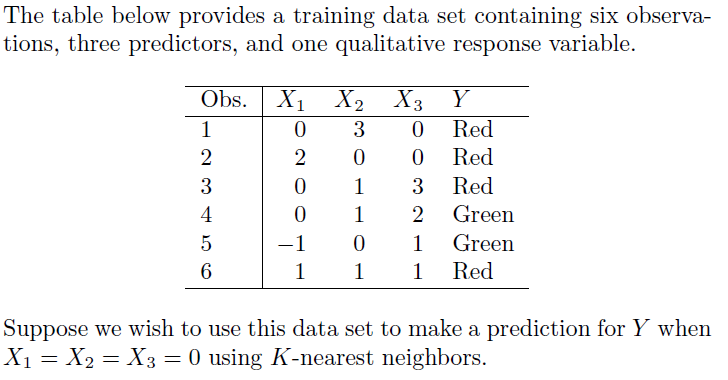

Solve for 1-NN and 3-NN

But it is not necessarily true that more flexible models provide better predictive accuracy. Can you guess why?

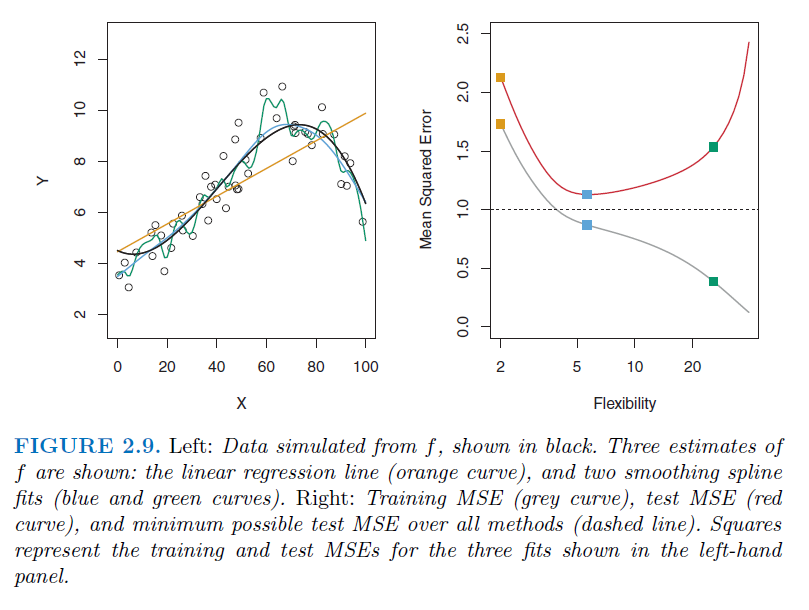

So the most important foundational notions about machine learning are that

1. Prediction on new data is what determines the "goodness" of a model
1. For predictions, adding flexibility to the model provides better results if the underlying process is not simple
1. However, predictions get worse when the model is too complex due to overfitting
1. Defining a metric for how well a model is doing can let a computer algorithm automatically decide the best model by iterating through many possibilities
1. The best model is the one that abstracts away all features that are not relevant for prediction

There are two large classes of machine learning algorithms: supervised and unsupervised algorithms

Supervised algorithms are used for questions that have a clear, defined answer. For instance, if you are designing a system that reads hand-written numbers, there is a "correct" answer. In this case, the algorithm can be trained on some data and then deployed on unseen data in which its performance can be quantified

Examples of supervised learning are 

1. Classification
2. Regression
3. Reinforcement learning

Unsupervised algorithms are used when the problem does not have labeled answers. For instance, if you have to find whether there are clusters of data points. Notice how in this case, it is not that there needn't be defined answers--just that the algorithm does not have access to these answers.

Example unsupervised algorithms are

1. Dimensionality reduction
2. Clustering 

The rest of the class will be broken down into 4 lectures. The rest of today will focus on dimensionality reduction. The next class will present clustering. The last two will cover classification and regression

Some of the following materials have been sourced from http://nbviewer.jupyter.org/github/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb

## Dimensionality reduction

The most important thing to understand before moving into the rest of the material is to understand that as data get high dimensional, analysis gets extremely hard. The reason for this is due to a phenomenon named the <a href="">curse of dimensionality</a> Check <a href="http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/">this</a> out

Thus, it is often important to reduce the dimensionality of your data. One of the most common ways to do this is principal components analysis

Before we get into PCA, let us take a look at Scikit-learn, the Python library that we will use for the rest of this course

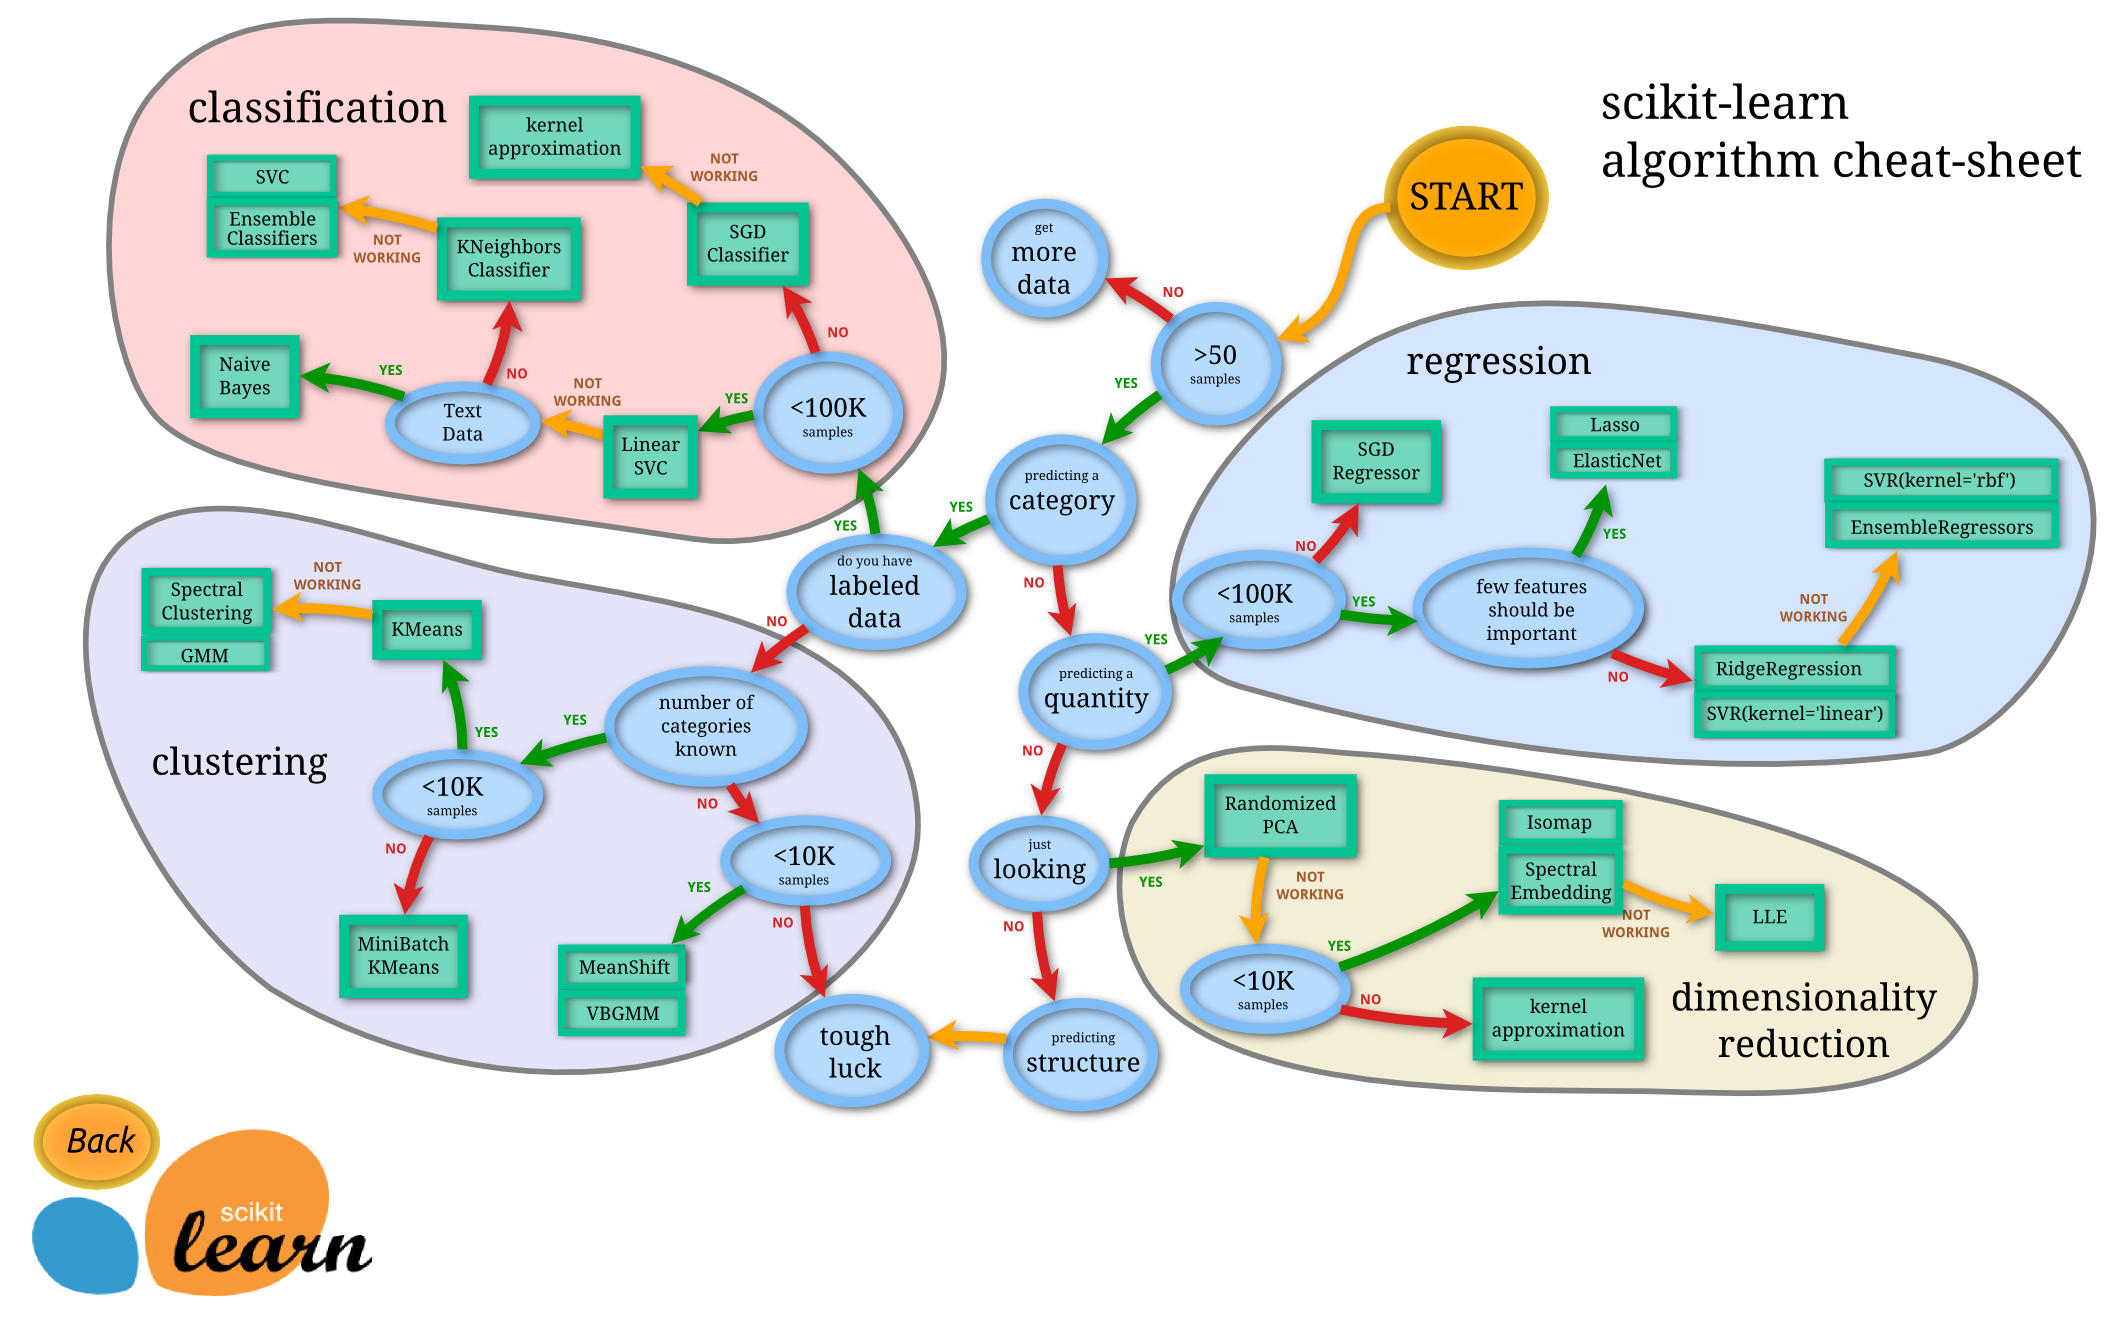

In [1]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png", width=800)

## Estimators

Given a scikit-learn estimator object named model, the following methods are available:

* Available in all Estimators
  * model.fit() : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).
* Available in supervised estimators
  * model.predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.
  * model.predict_proba() : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
  * model.score() : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.
* Available in unsupervised estimators
  * model.predict() : predict labels in clustering algorithms.
  * model.transform() : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
  * model.fit_transform() : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.



## PCA

To explain PCA, let us first tackle a very simple problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

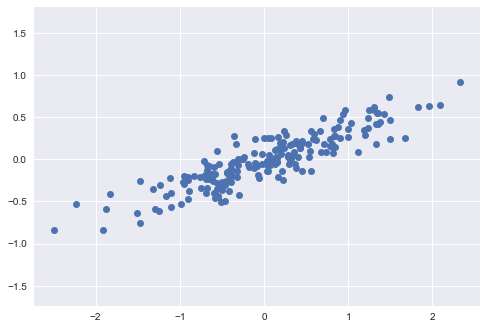

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [3]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


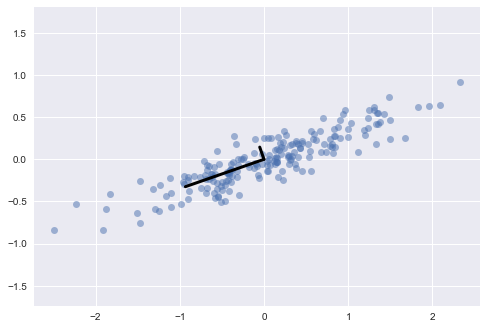

In [4]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction. The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be completely ignored without much loss of information! Let's see what our data look like if we only keep 95% of the variance

In [5]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200L, 2L)
(200L, 1L)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression

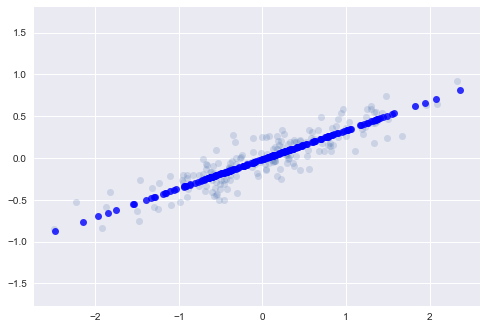

In [6]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

## Application to real data

In [7]:
populationdata = np.load((r'C:\Users\Vijay\Dropbox (Stuber Lab)\NBIO750 - Neuroanalytics\Lectures\data_for_lectures\data_for_pca.npy'))

print populationdata.shape

(4813L, 200L)


In [8]:
colors_for_key = {}
colors_for_key['plus'] = (0,0.5,1)
colors_for_key['minus'] = (1,0.5,0)
window_size = 100; pre_window_size = 15; frames_to_reward = 15; framerate = 5.0
csplus = populationdata[:,:window_size]
csminus = populationdata[:,window_size:]

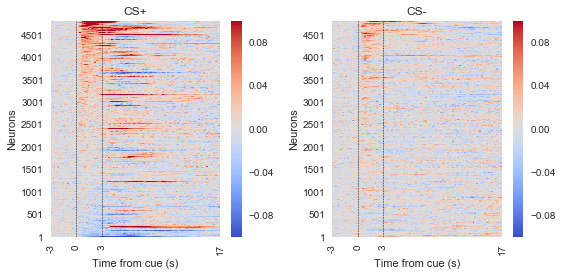

In [15]:
sortresponse = np.argsort(np.mean(csplus[:,pre_window_size:pre_window_size+frames_to_reward], axis=1))[::-1]
fig, axs = plt.subplots(1,2, figsize=(8,4))
ax = axs[0]
sns.heatmap(csplus[sortresponse,:],
            ax=ax,
            cmap=plt.get_cmap('coolwarm'),
            vmax=0.1, vmin=-0.1)
ax.set_title('CS+')
ax = axs[1]
sns.heatmap(csminus[sortresponse,:],
            ax=ax,
            cmap=plt.get_cmap('coolwarm'),
            vmax=0.1, vmin=-0.1)
ax.set_title('CS-')
for ax in axs:
    ax.grid(False)
    ax.set_ylabel('Neurons')
    ax.set_xlabel('Time from cue (s)')
    ax.set_yticks(range(0,populationdata.shape[0],500))
    ax.set_yticklabels([str(a+1) for a in range(0,populationdata.shape[0],500)])
    ax.set_xticks([0, pre_window_size,pre_window_size + frames_to_reward, window_size])
    ax.set_xticklabels([str(int((a-pre_window_size+0.0)/framerate))
                                             for a in [0, pre_window_size,
                                                       pre_window_size + frames_to_reward, window_size]])
    ax.axvline(pre_window_size, linestyle='--', color='k', linewidth=0.5) 
    ax.axvline(pre_window_size + frames_to_reward, linestyle='--', color='k', linewidth=0.5)
fig.tight_layout()

Number of PCs = 200
Number of PCs to keep = 8


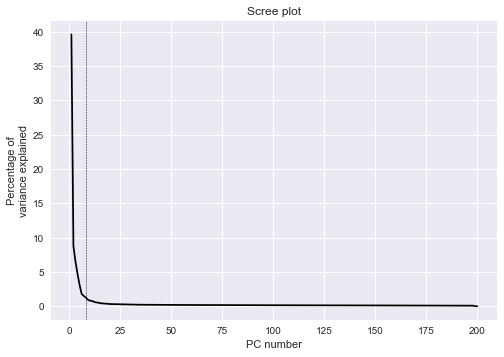

In [10]:
pca = PCA(n_components=populationdata.shape[1], whiten=True)
# pca = PCA(n_components='mle', whiten=True)
pca.fit(populationdata) 
    
transformed_data = pca.transform(populationdata)
pca_vectors = pca.components_
print 'Number of PCs = %d'%(pca_vectors.shape[0])

x = 100*pca.explained_variance_ratio_

xprime = x - (x[0] + (x[-1]-x[0])/(x.size-1)*np.arange(x.size))
threshold = np.argmin(xprime)
# Number of PCs to be kept is defined as the number at which the 
# scree plot bends. This is done by simply bending the scree plot
# around the line joining (1, variance explained by first PC) and
# (num of PCs, variance explained by the last PC) and finding the 
# number of components just below the minimum of this rotated plot
print 'Number of PCs to keep = %d'%(threshold)


fig, ax = plt.subplots()
ax.plot(np.arange(pca.explained_variance_ratio_.shape[0]).astype(int)+1, x, 'k')
ax.set_ylabel('Percentage of\nvariance explained')
ax.set_xlabel('PC number')
ax.axvline(threshold, linestyle='--', color='k', linewidth=0.5)
ax.set_title('Scree plot')

In [16]:
def select_number_of_pcs(data_for_pca, pca_results):
    # based on http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6846297
    
    beta = data_for_pca.shape[1]/(data_for_pca.shape[0]+0.0)
    omega = 0.56*beta**3 - 0.95*beta**2 + 1.82*beta + 1.43
    
    singular_values = np.sqrt(pca_results.explained_variance_*(data_for_pca.shape[1]-1))
    # https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
    # https://stats.stackexchange.com/questions/31908/what-is-percentage-of-variance-in-pca
    y_med = np.median(singular_values)
    
    num_pcs_to_retain = np.sum(singular_values>=omega*y_med)
    return num_pcs_to_retain

select_number_of_pcs(populationdata, pca)

19

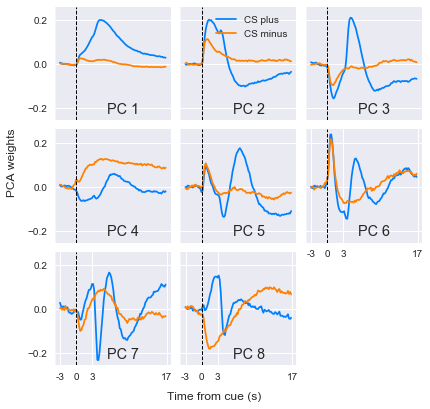

In [20]:
numcols = 3.0
fig, axs = plt.subplots(int(np.ceil(threshold/numcols)), int(numcols), sharey='all',
                        figsize=(2*numcols, 2*int(np.ceil(threshold/numcols))))
for pc in range(threshold):
    ax = axs.flat[pc]
    for k, tempkey in enumerate(colors_for_key.keys()):
        ax.plot(pca_vectors[pc,k*window_size:(k+1)*window_size], color=colors_for_key[tempkey],
                label='CS %s'%(tempkey))
        if pc==1:
            ax.legend(loc='upper right')
    ax.axvline(pre_window_size, linestyle='--', color='k', linewidth=1)
    ax.annotate(s='PC %d'%(pc+1), xy=(0.45, 0.06), xytext=(0.45, 0.06), xycoords='axes fraction',
                textcoords='axes fraction', multialignment='center', size='large')
    if pc >= threshold-numcols:
        ax.set_xticks([0, pre_window_size,
                       pre_window_size + frames_to_reward, window_size])
        ax.set_xticklabels([str(int((a-pre_window_size+0.0)/framerate))
                             for a in [0, pre_window_size,
                                       pre_window_size + frames_to_reward, window_size]])
    else:
        ax.set_xticks([])
        ax.xaxis.set_ticks_position('none')
    if pc%numcols:
        ax.yaxis.set_ticks_position('none')
    [i.set_linewidth(0.5) for i in ax.spines.itervalues()]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


fig.text(0.5, 0.05, 'Time from cue (s)', horizontalalignment='center', rotation='horizontal')
fig.text(0.02, 0.6, 'PCA weights', verticalalignment='center', rotation='vertical')
fig.tight_layout()
for ax in axs.flat[threshold:]:
    ax.set_visible(False)
    
fig.subplots_adjust(wspace=0.08, hspace=0.08)
fig.subplots_adjust(left=0.13)
fig.subplots_adjust(right=0.98)
fig.subplots_adjust(bottom=0.13)
fig.subplots_adjust(top=0.96)